In [268]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [269]:
cols = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]
df = pd.read_csv('wdbc.data', header=None, names=cols)
pd.set_option('display.max_columns', None)  
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basic Data Analyses

In [270]:
df.shape

(569, 32)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [272]:
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [273]:
df.duplicated().sum()

np.int64(0)

In [274]:
df.drop("ID",axis=1,inplace=True)

In [275]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [276]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64


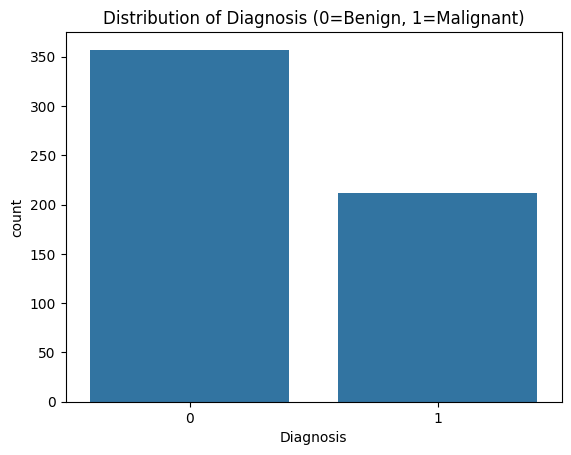

In [277]:
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Diagnosis (0=Benign, 1=Malignant)")
plt.show()

In [278]:
corr_target = df.corr()['Diagnosis'].abs().sort_values(ascending=False)

top_features = corr_target.index[1:11]
print("Top correlated features with Diagnosis:\n", list(top_features))

Top correlated features with Diagnosis:
 ['concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst']


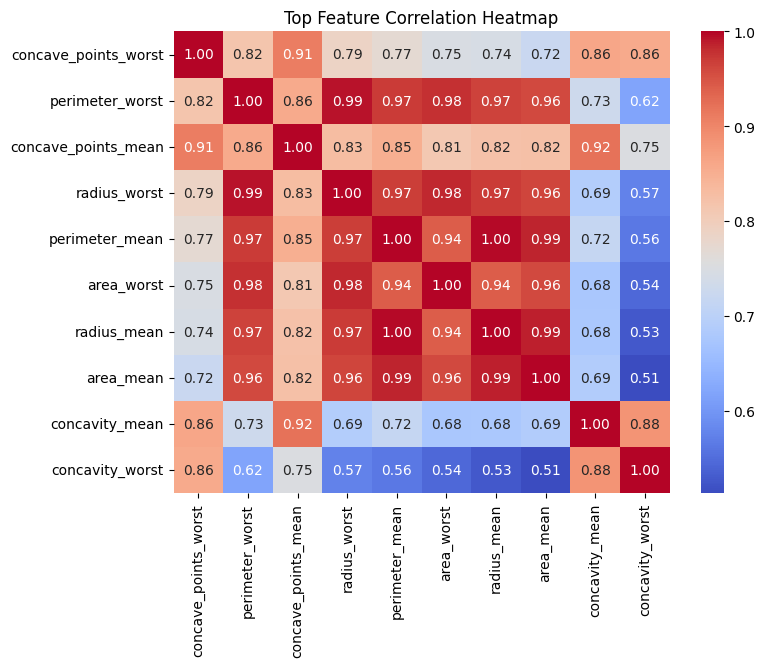

In [279]:
plt.figure(figsize=(8,6))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Top Feature Correlation Heatmap")
plt.show()

In [280]:
skewness = df.drop('Diagnosis', axis=1).skew()
print("Skewness of features:\n", skewness)

Skewness of features:
 radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave_points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave_points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
conca

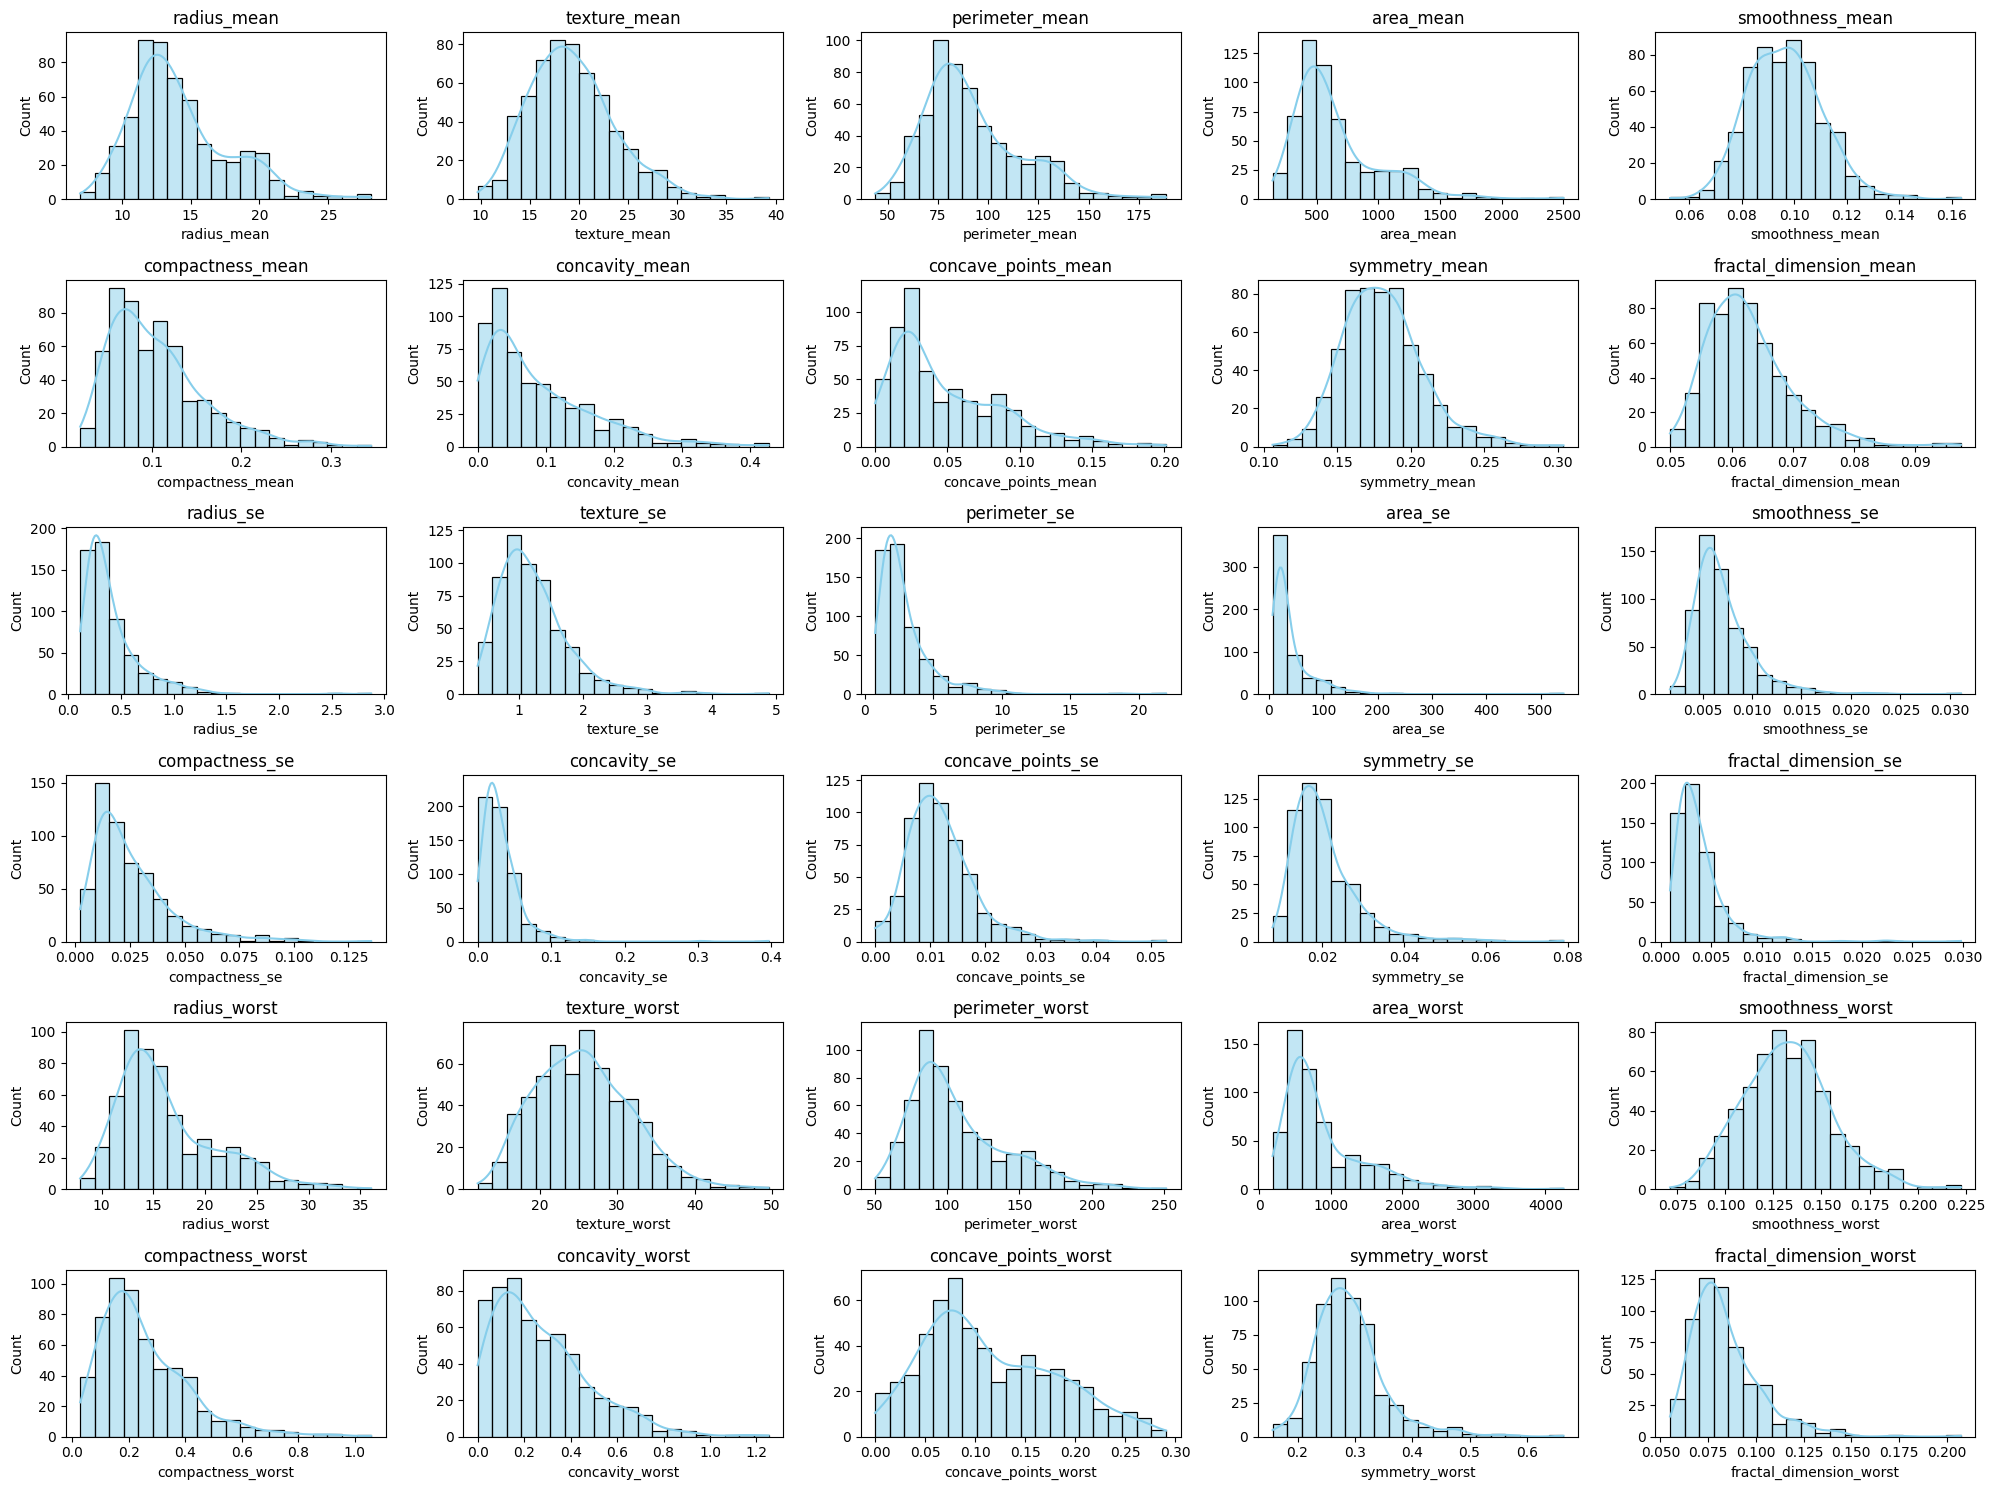

In [281]:
features = df.drop('Diagnosis', axis=1)

plt.figure(figsize=(20,15))
for i, column in enumerate(features.columns, 1):
    plt.subplot(6,5,i)
    sns.histplot(features[column], kde=True, bins=20, color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

In [282]:
features = df.drop('Diagnosis', axis=1)

for col in features.columns:
    Q1 = features[col].quantile(0.25)
    Q3 = features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((features[col] < lower) | (features[col] > upper)).sum()
    print(f"{col}: {outliers}")

radius_mean: 14
texture_mean: 7
perimeter_mean: 13
area_mean: 25
smoothness_mean: 6
compactness_mean: 16
concavity_mean: 18
concave_points_mean: 10
symmetry_mean: 15
fractal_dimension_mean: 15
radius_se: 38
texture_se: 20
perimeter_se: 38
area_se: 65
smoothness_se: 30
compactness_se: 28
concavity_se: 22
concave_points_se: 19
symmetry_se: 27
fractal_dimension_se: 28
radius_worst: 17
texture_worst: 5
perimeter_worst: 15
area_worst: 35
smoothness_worst: 7
compactness_worst: 16
concavity_worst: 12
concave_points_worst: 0
symmetry_worst: 23
fractal_dimension_worst: 24


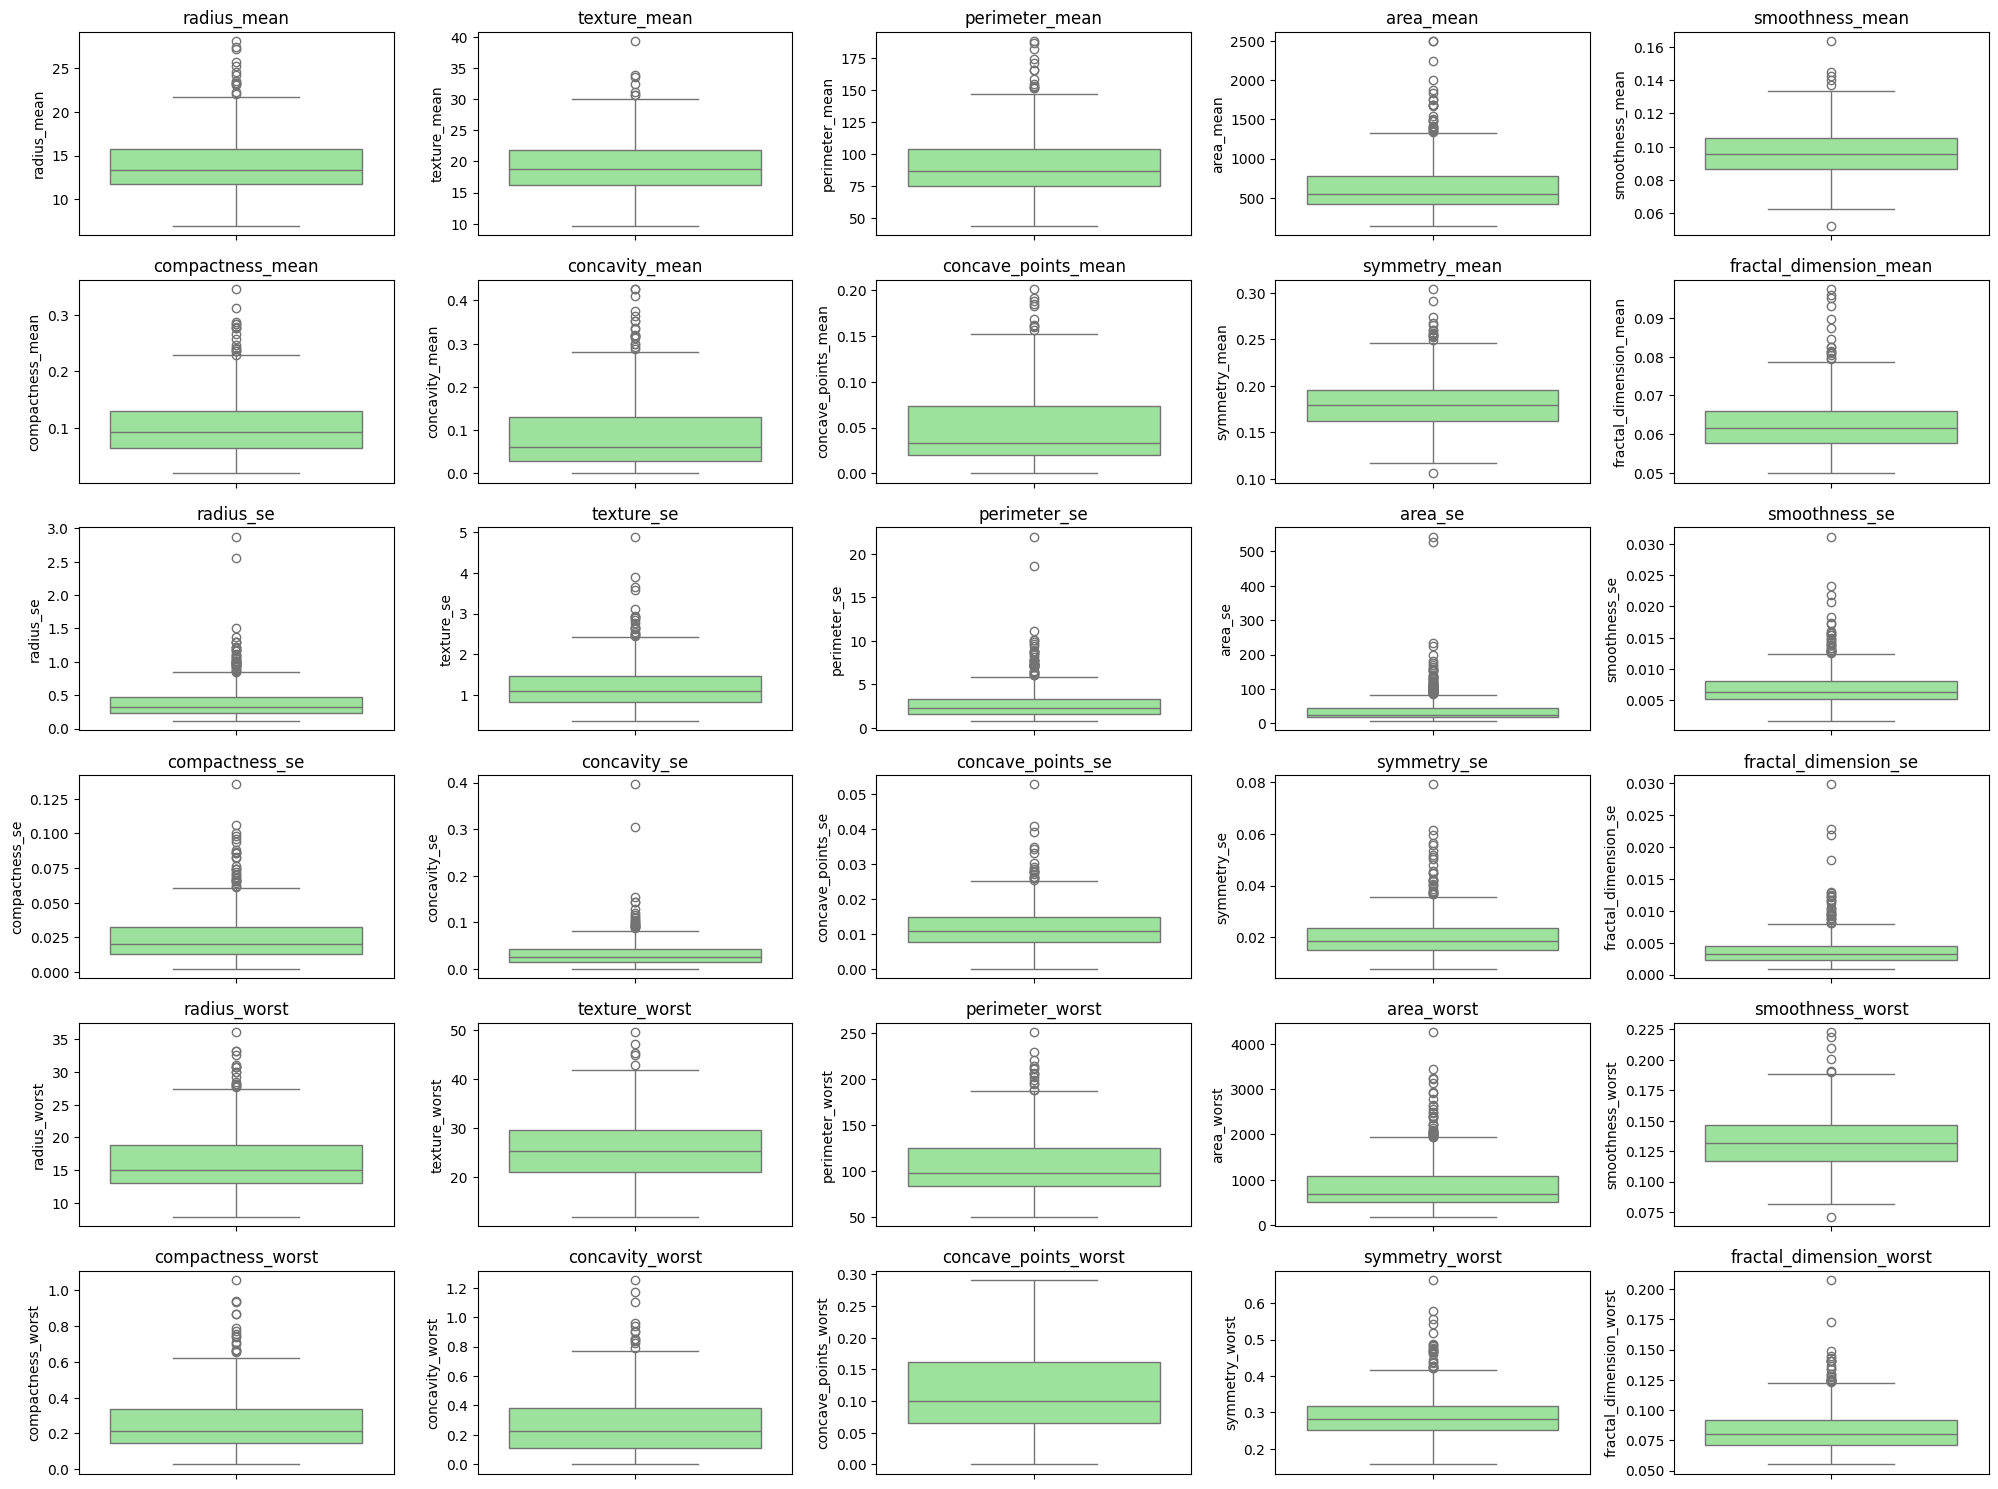

In [283]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(features.columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=features[column], color='lightgreen')
    plt.title(column)
plt.tight_layout()
plt.show()

In [284]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [285]:
skewed_features = [
    'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

pt = PowerTransformer(method='yeo-johnson', standardize=False)
X[skewed_features] = pt.fit_transform(X[skewed_features])

skewness_new = X[skewed_features].skew()
print("Skewness after Yeo-Johnson:\n", skewness_new)

Skewness after Yeo-Johnson:
 area_mean                  0.005204
compactness_mean           0.105564
concavity_mean             0.223924
concave_points_mean        0.198740
fractal_dimension_mean     0.036216
radius_se                  0.194796
perimeter_se               0.080793
area_se                    0.069306
smoothness_se              0.084004
compactness_se             0.204970
concavity_se               0.145901
concave_points_se         -0.037805
symmetry_se                0.135894
fractal_dimension_se       0.234550
radius_worst               0.033651
perimeter_worst            0.031123
area_worst                 0.026797
compactness_worst          0.091660
concavity_worst            0.085410
symmetry_worst            -0.052541
fractal_dimension_worst    0.081748
dtype: float64


In [286]:
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower, upper)

In [287]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [288]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

In [289]:
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

n_component = np.argmax(cumulative_var >= 0.90) + 1
print("Number of components to retain ~90% variance:", n_component)

Number of components to retain ~90% variance: 6


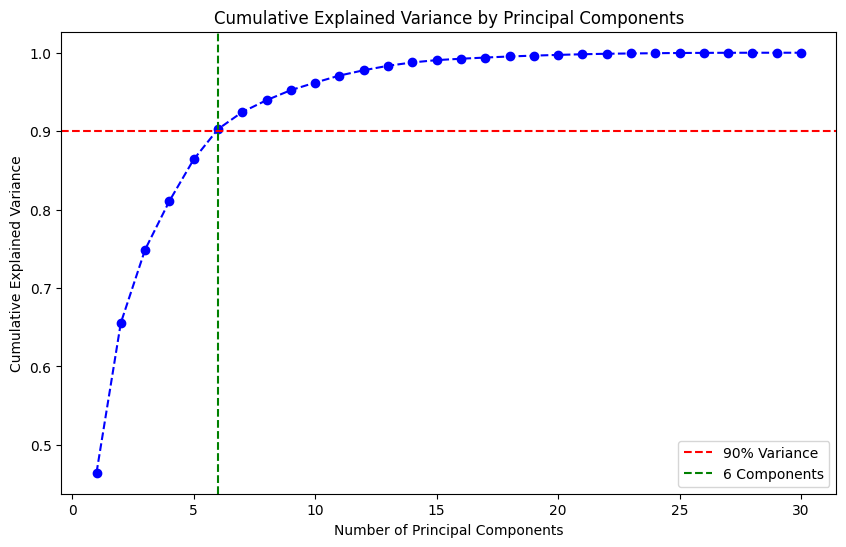

In [290]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_component, color='g', linestyle='--', label=f'{n_component} Components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

In [291]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [292]:
print("Explained variance ratio of 6 components:", pca.explained_variance_ratio_)

Explained variance ratio of 6 components: [0.46443952 0.19089682 0.09356607 0.06197955 0.05301984 0.03865449]


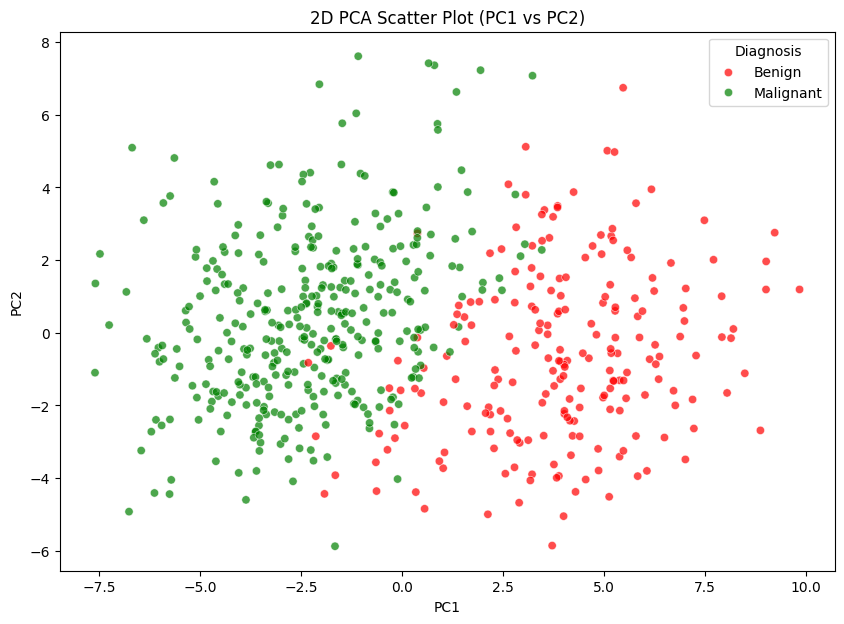

In [293]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['green','red'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot (PC1 vs PC2)')
plt.legend(title='Diagnosis', labels=['Benign','Malignant'])
plt.show()

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [295]:
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [296]:
y_pred = svm.predict(X_test)

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



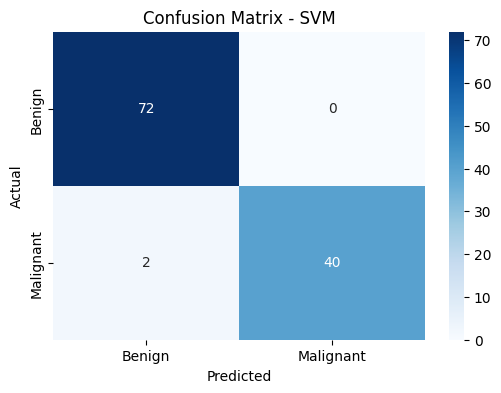

In [297]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [298]:
import pickle

# Save PowerTransformer
with open("pt.pkl", "wb") as f:
    pickle.dump(pt, f)

# Save StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save PCA
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# Save trained SVM model
with open("svm.pkl", "wb") as f:
    pickle.dump(svm, f)

print("✅ All objects saved successfully: pt.pkl, scaler.pkl, pca.pkl, svm.pkl")

✅ All objects saved successfully: pt.pkl, scaler.pkl, pca.pkl, svm.pkl
